Part 1

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import scipy.integrate

In [118]:
imazdata = '/Users/natenick/Desktop/lab7data/sun_azimuth/'
azfiles = glob.glob(imazdata + "sun*")
azfiles.sort()
imeldata = '/Users/natenick/Desktop/lab7data/sun_elevation/'
elfiles = glob.glob(imeldata + "sun*")
elfiles.sort()

for file in elfiles:
    print(file)

/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_m1
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_m2
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_m3
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_m4
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_m5
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p1
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p10
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p2
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p3
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p4
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p5
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p6
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p7
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p8
/Users/natenick/Desktop/lab7data/sun_elevation/sun_el_p9


In [112]:
az_spectra = []
for azfile in azfiles:
    with open(azfile) as azdata:
        spectrum_rows = []
        for j, row in enumerate(azdata, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows:
            temp_spec = row.split(' ')
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val)
            tot_spectrum = tot_spectrum + np.float64(spec)
        az_spectra.append(tot_spectrum)
        
el_spectra = []
for elfile in elfiles:
    with open(elfile) as eldata:
        spectrum_rows1 = []
        for j, row in enumerate(eldata, start=1):
            if j%4 == 0:
                spectrum_rows1.append(row)
        tot_spectrum1 = np.zeros(1024)
        for row in spectrum_rows1:
            temp_spec1 = row.split(' ')
            spec1 = []
            for val in temp_spec1:
                if val != '' and val != '\n':
                    spec1.append(val)
            tot_spectrum1 = tot_spectrum1 + np.float64(spec1)
        el_spectra.append(tot_spectrum1)
np.shape(az_spectra)
len(az_spectra)

20

Text(0, 0.5, 'Flux')

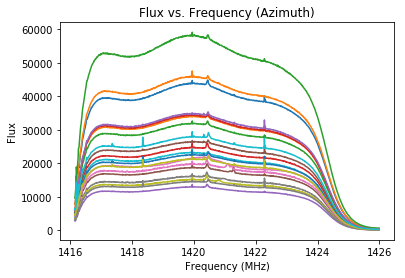

In [113]:
frequency = np.arange(1416, 1426, 0.009766)
for i in range(len(az_spectra)):
    az_spectra_ = az_spectra[i][15:]
    plt.plot(frequency[15:], az_spectra_)
plt.show
plt.title('Flux vs. Frequency (Azimuth)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

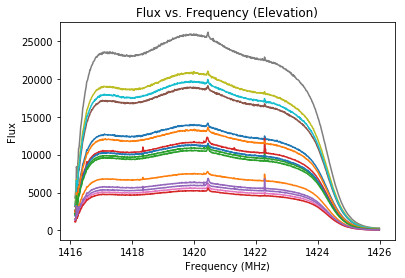

In [114]:
for i in range(len(el_spectra)):
    el_spectra_ = el_spectra[i][15:]
    plt.plot(frequency[15:], el_spectra_)
plt.show
plt.title('Flux vs. Frequency (Elevation)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux Sum')

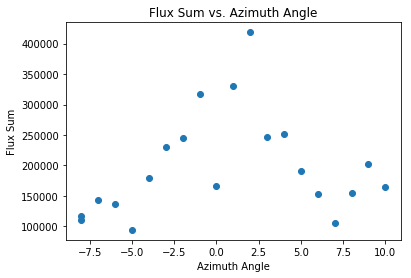

In [124]:
sumaz = np.trapz(az_spectra, frequency)
order = [-1,-2,-3,-4,-5,-6,-7,-8,-8,0,10,1,2,3,4,5,6,7,8,9]
plt.scatter(order, sumaz)
plt.title('Flux Sum vs. Azimuth Angle')
plt.xlabel('Azimuth Angle')
plt.ylabel('Flux Sum')

Text(0, 0.5, 'Flux Sum')

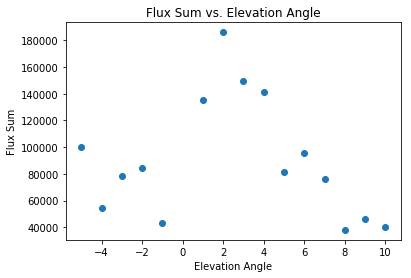

In [147]:
sumel = np.trapz(el_spectra, frequency)
order2 = [-5,-4,-3,-2,-1,1,10,2,3,4,5,6,7,8,9]
plt.scatter(order2, sumel)
plt.title('Flux Sum vs. Elevation Angle')
plt.xlabel('Elevation Angle')
plt.ylabel('Flux Sum')

[1.38605359e-02 1.99812622e+00 1.46754772e+04]


Text(0, 0.5, 'Flux Sum')

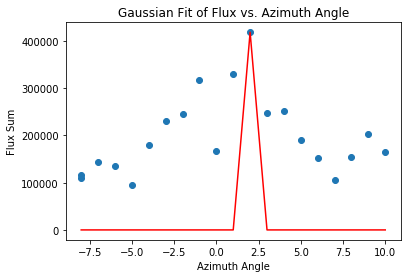

In [171]:
(a0,b0,c0) = (6,1,4)
#t1 = 1/((a*(2*3.14)**0.5))
#t2 = -((x-b)**2)/((2*a**2))
def func (x,a,b,c):
    return c*(1/(a*((2*3.14)**0.5)))*np.exp(-((x-b)**2)/(2*a**2))
coeffs, fiterr = curve_fit(func, order, sumaz, p0=(a0,b0,c0))
plt.scatter(order, sumaz)
plt.plot(np.sort(order),func(np.sort(order),*coeffs),'r')
plt.show
print(coeffs)
plt.title('Gaussian Fit of Flux vs. Azimuth Angle')
plt.xlabel('Azimuth Angle')
plt.ylabel('Flux Sum')

[6.30661423e+00 1.27436839e+00 4.41931950e+06]


Text(0, 0.5, 'Flux Sum')

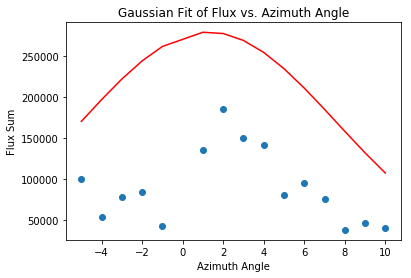